In [1]:
### 🔧 TAREA
#Antes de entrenar la red neuronal, modifica los hiperparámetros en `config.yaml`, especialmente:
#- `hidden_layers`: cambia el número de capas o neuronas.
#- `activation`: prueba funciones como `tanh` o `elu`.
#- `epochs`: aumenta o reduce el número de épocas.
#
#Luego, vuelve a ejecutar este notebook y observa cómo cambia el rendimiento.

In [2]:
import os
print(os.getcwd())

import sys
sys.path.append("../src")

import train
import model
import utils
import evaluate as ev
import pandas as pd
import numpy as np
import yaml

c:\Users\fpaez\Documents\GitHub\DeepNeuralNetworkUSS\Projects\Credit\notebooks


In [3]:
# 🔧 Cargar configuración
config = train.load_config("../config.yaml")

# 📦 Cargar y preparar los datos
X, y = train.load_data("../data/credit_clean.csv")
X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

In [4]:
# 🧠 Construir el modelo
input_dim = X_train.shape[1]
nn_model = model.build_model(config, input_dim)

c:\Users\fpaez\Documents\GitHub\DeepNeuralNetworkUSS\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 🚀 Entrenar el modelo
history = train.train_model(nn_model, X_train, y_train, config)

Epoch 1/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6630 - loss: 0.6598 - val_accuracy: 0.7436 - val_loss: 0.5809
Epoch 2/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7404 - loss: 0.5693 - val_accuracy: 0.7468 - val_loss: 0.5649
Epoch 3/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7448 - loss: 0.5604 - val_accuracy: 0.7487 - val_loss: 0.5607
Epoch 4/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7438 - loss: 0.5578 - val_accuracy: 0.7426 - val_loss: 0.5553
Epoch 5/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7475 - loss: 0.5513 - val_accuracy: 0.7412 - val_loss: 0.5540
Epoch 6/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7387 - loss: 0.5497 - val_accuracy: 0.7436 - val_loss: 0.5492
Epoch 7/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7471 - loss: 0.5416 - val_accuracy: 0.7495 - val_loss: 0.5447
Epoch 8/30
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7445 - loss: 0.5385 - val_accuracy: 0.

In [6]:
# 💾 Guardar modelo entrenado
utils.save_model(nn_model, path="../models/nn_model.keras")

✅ Modelo guardado en ../models/nn_model.keras


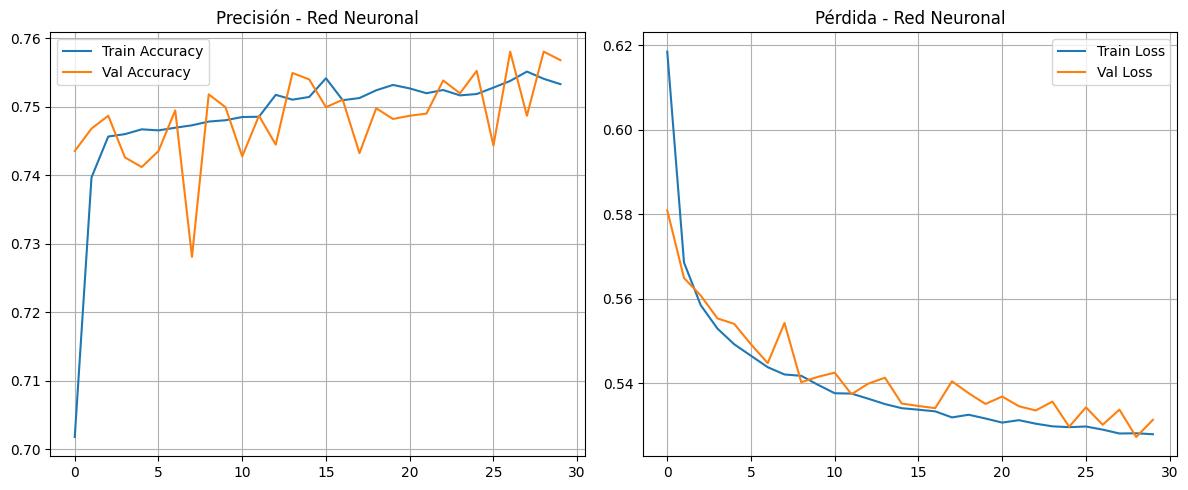

In [7]:
# 📈 Visualizar evolución del entrenamiento
utils.plot_training_history(history, model_name="Red Neuronal")

In [8]:
### 📊 Pregunta de reflexión
# ¿Ves signos de sobreajuste en las curvas de pérdida o precisión?  
# ¿Cuál fue la época donde la validación alcanzó su mejor punto?  
# ¿Qué pasaría si entrenaras con más (o menos) datos?

## 🔍 Comparación de Entrenamientos – Red Neuronal

### Cambios realizados en `config.yaml`
- `epochs`: se aumentaron de 20 a 30 
- `hidden_layers`: se modificaron (asumido)
- `activation`: se asigno la función `tanh`
- `batch_size`: se aumento de 32 a 64

---

## Preguntas de reflexión

### ¿Ves signos de sobreajuste en las curvas de pérdida o precisión?
**Respuesta:**  
No se observan signos relevantes de sobreajuste. La precisión y la pérdida entre entrenamiento y validación se mantienen bastante cercanas, con una ligera fluctuación en validación que es esperable. Aumentar las épocas no empeoró la generalización, lo cual indica un buen control del modelo a mi entender..

---

### ¿Cuál fue la época donde la validación alcanzó su mejor punto?
**Respuesta:**  
- En el primer entrenamiento (20 epochs), el mejor punto de validación parece estar cerca de la **época 13–15**.  
- En el segundo entrenamiento (30 epochs), el modelo mejora lentamente y alcanza su mejor validación cerca de la **época 28–30**, lo que valida el aumento de épocas.

---

### ¿Qué pasaría si entrenaras con más (o menos) datos?
**Respuesta:**  
- **Con más datos:** se esperaría una mejora en la generalización y menor varianza en la precisión de validación, además de un entrenamiento más robusto.
- **Con menos datos:** el modelo podría sobreajustarse fácilmente, mostrando una gran brecha entre entrenamiento y validación.
